In [1]:
from os import path
import sys
sys.path.append(path.abspath('..'))
from route_dynamics.route_elevation import base as rbs
from route_dynamics.route_energy import longi_dynam_model as ldm
from route_dynamics.tests import test_longi_dynam_model as tldm
from route_dynamics.tests import simple_route as sro

import numpy as np
import pandas as pd

In [2]:
test_instance__0_grade = sro.SimpleRouteTrajectory(
        [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),],
        bus_speed_model='stopped_at_stops__15mph_between',
        stop_coords=None,
        elevation_gradient_const=0,
        )

In [3]:
test_instance__0_grade.route_df

,coordinates,gradient,geometry,distance_from_last_point,cum_distance,is_bus_stop,velocity,delta_time,acceleration,passenger_mass,grav_force,roll_fric,aero_drag,inertia,power_output
0,"(1, 0)",0.0,None,NaN,0.0,False,0.0000,NaN,NaN,0.0,-0.0,-1268.1387,-0.000000,NaN,NaN
1,"(2, 0)",0.0,"LINESTRING (1 0, 2 0)",1.0,1.0,False,6.7056,3.3528,2.0,0.0,-0.0,-1268.1387,-11.981465,25854.0,181950.556182
2,"(3, 0)",0.0,"LINESTRING (2 0, 3 0)",1.0,2.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
3,"(4, 0)",0.0,"LINESTRING (3 0, 4 0)",1.0,3.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
4,"(5, 0)",0.0,"LINESTRING (4 0, 5 0)",1.0,4.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
5,"(6, 0)",0.0,"LINESTRING (5 0, 6 0)",1.0,5.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
6,"(7, 0)",0.0,"LINESTRING (6 0, 7 0)",1.0,6.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
7,"(8, 0)",0.0,"LINESTRING (7 0, 8 0)",1.0,7.0,False,6.7056,6.7056,0.0,0.0,-0.0,-1268.1387,-11.981465,0.0,8583.973782
8,"(9, 0)",0.0,"LINESTRING (8 0, 9 0)",1.0,8.0,False,0.0000,3.3528,-2.0,0.0,-0.0,-1268.1387,-0.000000,-25854.0,-0.000000


In [4]:
test_instance__1_grade = sro.SimpleRouteTrajectory(
        [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),],
        bus_speed_model='stopped_at_stops__15mph_between',
        stop_coords=None,
        elevation_gradient_const=1,
        )

In [5]:
test_instance__1_grade.route_df

,coordinates,gradient,geometry,distance_from_last_point,cum_distance,is_bus_stop,velocity,delta_time,acceleration,passenger_mass,grav_force,roll_fric,aero_drag,inertia,power_output
0,"(1, 0)",1.0,None,NaN,0.0,False,0.0000,NaN,NaN,0.0,-89670.947426,-896.709474,-0.000000,NaN,NaN
1,"(2, 0)",1.0,"LINESTRING (1 0, 2 0)",1.0,1.0,False,6.7056,3.3528,2.0,0.0,-89670.947426,-896.709474,-11.981465,25854.0,780757.405422
2,"(3, 0)",1.0,"LINESTRING (2 0, 3 0)",1.0,2.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
3,"(4, 0)",1.0,"LINESTRING (3 0, 4 0)",1.0,3.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
4,"(5, 0)",1.0,"LINESTRING (4 0, 5 0)",1.0,4.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
5,"(6, 0)",1.0,"LINESTRING (5 0, 6 0)",1.0,5.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
6,"(7, 0)",1.0,"LINESTRING (6 0, 7 0)",1.0,6.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
7,"(8, 0)",1.0,"LINESTRING (7 0, 8 0)",1.0,7.0,False,6.7056,6.7056,0.0,0.0,-89670.947426,-896.709474,-11.981465,0.0,607390.823022
8,"(9, 0)",1.0,"LINESTRING (8 0, 9 0)",1.0,8.0,False,0.0000,3.3528,-2.0,0.0,-89670.947426,-896.709474,-0.000000,-25854.0,0.000000


In [6]:
test_instance__stop = sro.SimpleRouteTrajectory(
        [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),],
        bus_speed_model='stopped_at_stops__15mph_between',
        stop_coords=[(6.43,0.54)],
        elevation_gradient_const=0.,
        )

In [7]:
test_instance__stop.route_df.iloc[5].is_bus_stop

True

In [8]:
import numpy as np
len(np.append(np.nan, np.ones(9)))

10

## Testing realistic velocity model

In [9]:
real_instance_1 = sro.SimpleRouteTrajectory(
        [(1,0),(2,0),(3,0),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),],
        bus_speed_model='const_accel_between_stops_and_speed_lim',
        stop_coords=None,
        elevation_gradient_const=1,
        )

real_instance_1.route_df

In [10]:
space = range(1,100)
coords = list(zip(space,[0]*len(space)))
# coords

In [11]:
real_instance_2 = sro.SimpleRouteTrajectory(
        coords,
        bus_speed_model='const_accel_between_stops_and_speed_lim',
        stop_coords=[(60,0), (65,0)],
        elevation_gradient_const=1,
        )

In [12]:
real_instance_2.route_df

,coordinates,gradient,geometry,distance_from_last_point,cum_distance,is_bus_stop,acceleration,velocity,delta_time,passenger_mass,grav_force,roll_fric,aero_drag,inertia,power_output
0,"(1, 0)",1.0,None,NaN,0.0,False,1.0,0.000000,NaN,0.0,-89670.947426,-896.709474,-0.000000,12927.0,0.000000
1,"(2, 0)",1.0,"LINESTRING (1 0, 2 0)",1.0,1.0,False,1.0,1.414214,0.707107,0.0,-89670.947426,-896.709474,-2.526896,12927.0,146367.120991
2,"(3, 0)",1.0,"LINESTRING (2 0, 3 0)",1.0,2.0,False,1.0,2.000000,1.707107,0.0,-89670.947426,-896.709474,-3.573570,12927.0,206996.460940
3,"(4, 0)",1.0,"LINESTRING (3 0, 4 0)",1.0,3.0,False,1.0,2.449490,2.224745,0.0,-89670.947426,-896.709474,-4.376712,12927.0,253519.821219
4,"(5, 0)",1.0,"LINESTRING (4 0, 5 0)",1.0,4.0,False,1.0,2.828427,2.638958,0.0,-89670.947426,-896.709474,-5.053791,12927.0,292741.389122
5,"(6, 0)",1.0,"LINESTRING (5 0, 6 0)",1.0,5.0,False,1.0,3.162278,2.995352,0.0,-89670.947426,-896.709474,-5.650310,12927.0,327296.709311
6,"(7, 0)",1.0,"LINESTRING (6 0, 7 0)",1.0,6.0,False,1.0,3.464102,3.313190,0.0,-89670.947426,-896.709474,-6.189605,12927.0,358537.449545
7,"(8, 0)",1.0,"LINESTRING (7 0, 8 0)",1.0,7.0,False,1.0,3.741657,3.602880,0.0,-89670.947426,-896.709474,-6.685537,12927.0,387266.562471
8,"(9, 0)",1.0,"LINESTRING (8 0, 9 0)",1.0,8.0,False,1.0,4.000000,3.870829,0.0,-89670.947426,-896.709474,-7.147140,12927.0,414007.216159
9,"(10, 0)",1.0,"LINESTRING (9 0, 10 0)",1.0,9.0,False,1.0,4.242641,4.121320,0.0,-89670.947426,-896.709474,-7.580687,12927.0,439122.804392


In [13]:
real_instance_2.x_ls

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., nan,  1.,  2.,  3.,  4., nan,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34.])

Text(0, 0.5, 'speed')

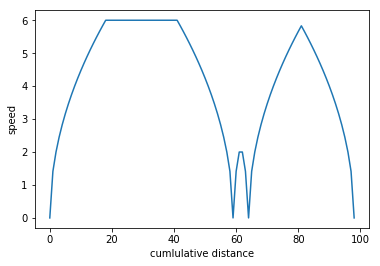

In [14]:
import matplotlib.pyplot as plt
plt.figure()
x = real_instance_2.route_df.cum_distance.values
v = real_instance_2.route_df.velocity.values
plt.plot(x,v)
plt.xlabel('cumlulative distance')
plt.ylabel('speed')